In [ ]:
%pip install pandas numpy scikit-learn matplotlib seaborn

In [9]:
import pandas as pd
import os

# Define paths
base_path = 'titanic' 
files = {'train': os.path.join(base_path, 'train.csv')}

# Load data
if os.path.exists(files['train']):
    df_train = pd.read_csv(files['train'])
    print("--- DATA INGESTION REPORT (RELIABILITY LAYER) ---")
    print(f"Dataset loaded. Shape: {df_train.shape}")
    
    # Check for Constraints (Missing Values)
    print("\n--- SYSTEM CONSTRAINTS CHECK ---")
    nulls = df_train.isnull().sum()
    print("Missing values detected (Chaos Sources):")
    print(nulls[nulls > 0])
else:
    print("Error: train.csv not found")

--- DATA INGESTION REPORT (RELIABILITY LAYER) ---
Dataset loaded. Shape: (891, 12)

--- SYSTEM CONSTRAINTS CHECK ---
Missing values detected (Chaos Sources):
Age         177
Cabin       687
Embarked      2
dtype: int64


In [10]:
# --- RELIABILITY LAYER IMPLEMENTATION ---

def preprocess_dataset_english(df):
    df_clean = df.copy()
    
    # R1: Handling Missing Data (Imputation)
    if 'Age' in df_clean.columns:
        df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
    if 'Embarked' in df_clean.columns:
        df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
    if 'Fare' in df_clean.columns:
        df_clean['Fare'] = df_clean['Fare'].fillna(df_clean['Fare'].median())

    # R4: Feature Interaction (FamilySize)
    df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
    
    # R2: Categorical Processing
    df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
    if 'Embarked' in df_clean.columns:
        df_clean['Embarked'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    
    # Select Features
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked']
    if 'Survived' in df_clean.columns:
        return df_clean[features + ['Survived']]
    return df_clean[features]

# Execute
train_clean = preprocess_dataset_english(df_train)

print("\n--- FINAL DATASET STATE (READY FOR SIMULATION) ---")
print(f"Clean Data Shape: {train_clean.shape}")
print("Remaining missing values:", train_clean.isnull().sum().sum())
print("\nFirst 5 rows of processed system:")
print(train_clean.head())


--- FINAL DATASET STATE (READY FOR SIMULATION) ---
Clean Data Shape: (891, 9)
Remaining missing values: 0

First 5 rows of processed system:
   Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  Embarked  Survived
0       3    0  22.0      1      0   7.2500           2         0         0
1       1    1  38.0      1      0  71.2833           2         1         1
2       3    1  26.0      0      0   7.9250           1         0         1
3       1    1  35.0      1      0  53.1000           2         0         1
4       3    0  35.0      0      0   8.0500           1         0         0


--- SIMULATION RESULTS ---
System Accuracy: 83.24%


C:\Users\Mauro\AppData\Local\Temp\ipykernel_4696\1959203520.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


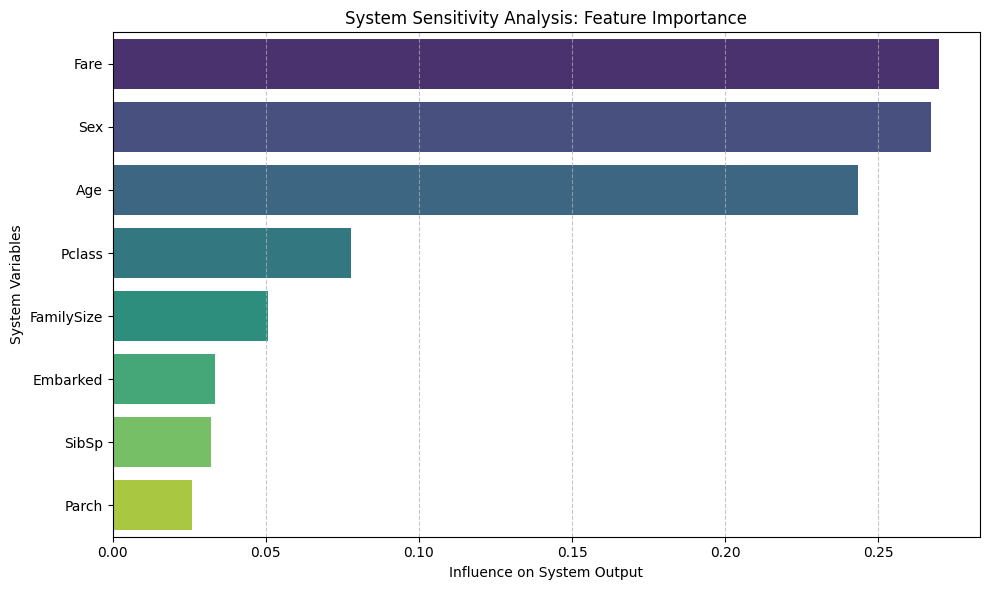

In [11]:
# --- SCENARIO 1: DATA-DRIVEN SIMULATION ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
X = train_clean.drop('Survived', axis=1)
y = train_clean['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate Learning (Modeling Layer)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
acc = accuracy_score(y_val, model.predict(X_val))
print(f"--- SIMULATION RESULTS ---")
print(f"System Accuracy: {acc:.2%}")

# Sensitivity Analysis Plot
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('System Sensitivity Analysis: Feature Importance')
plt.xlabel('Influence on System Output')
plt.ylabel('System Variables')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # This generates the plot

SUCCESS: Image 'cellular_automata.png' saved successfully.


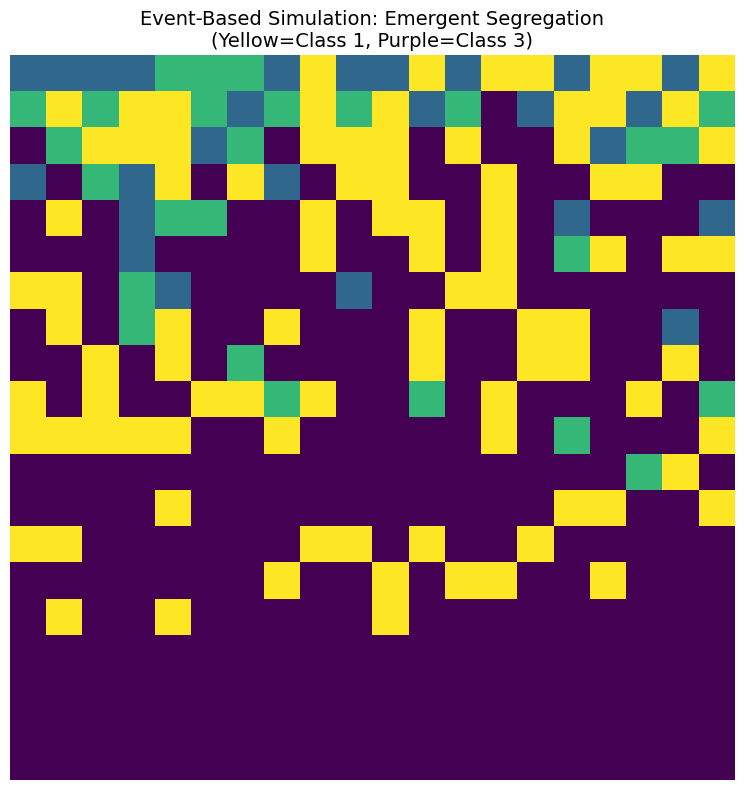

In [6]:
# --- SCENARIO 2: EVENT-BASED SIMULATION (CELLULAR AUTOMATA) ---
# Complete script: Data Loading + Cleaning + Simulation + English Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. SETUP & DATA PREPARATION (Fixing the 'train_clean' error)
# Load raw data
if os.path.exists('titanic/train.csv'):
    df = pd.read_csv('titanic/train.csv')
else:
    # Fallback if folder structure varies
    df = pd.read_csv('train.csv')

# Quick Preprocessing (Reliability Layer Logic) to create 'train_clean'
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# Select only necessary columns
train_clean = df[['Pclass', 'Sex', 'Age']].copy()

# 2. SIMULATION CONFIGURATION
GRID_SIZE = 20
NUM_PASSENGERS = 200
grid_pclass = np.zeros((GRID_SIZE, GRID_SIZE))

# 3. POPULATE GRID (INITIAL STATE)
# We use a sample from the clean dataset to represent real demographics
sample = train_clean.sample(NUM_PASSENGERS, random_state=42)
positions = []

for _, row in sample.iterrows():
    while True:
        # Random initial position
        r, c = np.random.randint(1, GRID_SIZE), np.random.randint(0, GRID_SIZE)
        if grid_pclass[r, c] == 0: # If cell is empty
            grid_pclass[r, c] = row['Pclass']
            # Store agent with attributes
            positions.append({'r': r, 'c': c, 'pclass': row['Pclass']})
            break

# 4. SIMULATION LOGIC (THE EVENT LOOP)
# Rule: All agents try to move UP (row - 1) towards Lifeboats.
# Priority Rule: Class 1 moves first and has higher probability.

for step in range(15): # Run 15 time steps
    # SORT BY PRIORITY: Class 1 moves first (Social Hierarchy)
    positions.sort(key=lambda x: x['pclass']) 
    
    new_grid = np.zeros((GRID_SIZE, GRID_SIZE))
    new_positions = []
    
    for p in positions:
        r, c = p['r'], p['c']
        
        # Movement Probability:
        # Class 1: 90% chance to move (Easy access)
        # Class 3: 40% chance to move (Obstacles/Gates)
        prob_move = 0.9 if p['pclass'] == 1 else (0.7 if p['pclass'] == 2 else 0.4)
        
        # Try to move UP (r - 1)
        if r > 0 and np.random.rand() < prob_move and new_grid[r-1, c] == 0:
            new_r = r - 1 # Move successful
        else:
            new_r = r # Blocked (Chaos/Conflict)
            
        new_grid[new_r, c] = p['pclass']
        p['r'] = new_r
        new_positions.append(p)
    
    positions = new_positions
    grid_pclass = new_grid

# 5. GENERATE AND SAVE VISUALIZATION (ENGLISH)
plt.figure(figsize=(8, 8))
# Colormap 'viridis':
# 1 (High Class) = Yellow/Light Green
# 3 (Low Class) = Purple/Dark Blue
plt.imshow(grid_pclass, cmap='viridis', vmin=0, vmax=3)

# Title in English for the Report
plt.title('Event-Based Simulation: Emergent Segregation\n(Yellow=Class 1, Purple=Class 3)', fontsize=14)
plt.axis('off') # Hide axes for cleaner look
plt.tight_layout()

# Save file for Overleaf
plt.savefig('cellular_automata.png', dpi=300)
print("SUCCESS: Image 'cellular_automata.png' saved successfully.")
plt.show()

SUCCESS: Image 'workflow_diagram.png' generated.


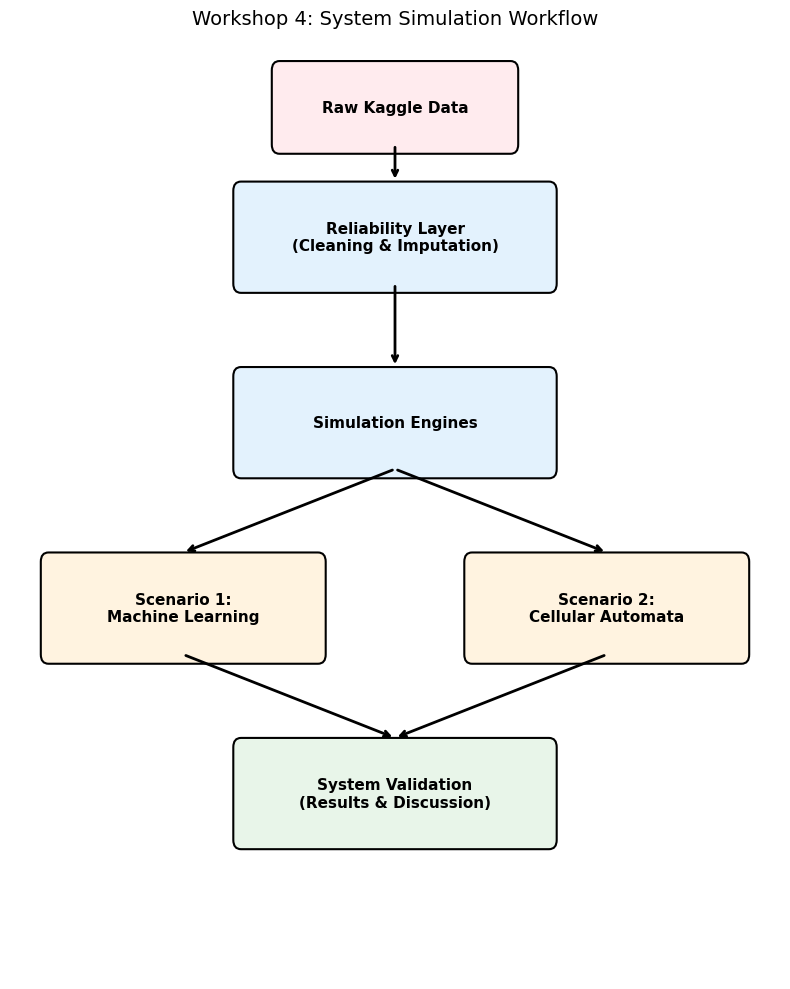

In [7]:
# --- GENERACIÓN DE DIAGRAMA DE FLUJO (WORKFLOW DIAGRAM) ---
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_box(ax, x, y, width, height, text, color='#E6F3FF'):
    # Caja con bordes redondeados
    box = patches.FancyBboxPatch((x, y), width, height, 
                                 boxstyle="round,pad=0.1", 
                                 edgecolor="black", facecolor=color, linewidth=1.5)
    ax.add_patch(box)
    # Texto centrado
    ax.text(x + width/2, y + height/2, text, ha='center', va='center', fontsize=11, fontweight='bold')

def draw_arrow(ax, x1, y1, x2, y2):
    ax.annotate("", xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", lw=2, color="black"))

# Configuración del Lienzo
fig, ax = plt.subplots(figsize=(8, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# 1. Nodos (Cajas)
# (x, y, width, height)
draw_box(ax, 3.5, 9.0, 3.0, 0.8, "Raw Kaggle Data", color='#FFEBEE')         # Input
draw_box(ax, 3.0, 7.5, 4.0, 1.0, "Reliability Layer\n(Cleaning & Imputation)", color='#E3F2FD') # Layer 1
draw_box(ax, 3.0, 5.5, 4.0, 1.0, "Simulation Engines", color='#E3F2FD')      # Core
draw_box(ax, 0.5, 3.5, 3.5, 1.0, "Scenario 1:\nMachine Learning", color='#FFF3E0') # Scen 1
draw_box(ax, 6.0, 3.5, 3.5, 1.0, "Scenario 2:\nCellular Automata", color='#FFF3E0') # Scen 2
draw_box(ax, 3.0, 1.5, 4.0, 1.0, "System Validation\n(Results & Discussion)", color='#E8F5E9') # Output

# 2. Flechas (Conexiones)
draw_arrow(ax, 5.0, 9.0, 5.0, 8.6) # Input -> Reliability
draw_arrow(ax, 5.0, 7.5, 5.0, 6.6) # Reliability -> Engines

# Bifurcación
draw_arrow(ax, 5.0, 5.5, 2.25, 4.6) # Engines -> Scen 1
draw_arrow(ax, 5.0, 5.5, 7.75, 4.6) # Engines -> Scen 2

# Convergencia
draw_arrow(ax, 2.25, 3.5, 5.0, 2.6) # Scen 1 -> Validation
draw_arrow(ax, 7.75, 3.5, 5.0, 2.6) # Scen 2 -> Validation

plt.title("Workshop 4: System Simulation Workflow", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('workflow_diagram.png', dpi=300)
print("SUCCESS: Image 'workflow_diagram.png' generated.")
plt.show()